In [1]:
import pandas as pd

In [22]:
from IPython.core.display import display, HTML

 

display(HTML("<style>.container { height: 50% !important; }</style>"))

In [67]:
# path, split, label, bb_x, bb_y, bb_w, bb_h, width, height, id, is_crowd
# id_to_path_and_size
def tlxywh_to_cxywh(box, width, height):
    tlx, tly, w, h = box
    tlx, tly, w, h = tlx / width, tly / height, w / width, h / height
    cx, cy = (w + tlx) / 2, (h + tly) / 2
    return [cx, cy, w, h]

def make_meta(sample, split):
    id_to_path_size = {d['id']:(d['fileName'], d['width'], d['height']) for d in sample['images']}

    meta_dict = {'path':[], 'split':[], 'code':[], 'bb_x':[], 'bb_y':[], 'bb_w':[], 'bb_h':[], 
                 'width':[], 'height':[], 'id':[], 'iscrowd':[]}

    for ann in sample['annotations']:
        id_ = ann['image_id']
        path = id_to_path_size[id_][0]
        width = id_to_path_size[id_][1]
        height = id_to_path_size[id_][2]
        code = path.split('_')[0]
        bb_x, bb_y, bb_w, bb_h = tlxywh_to_cxywh(ann['bbox'], width, height)
        iscrowd = ann['iscrowd']
        meta_dict['path'].append(path)
        meta_dict['split'].append(split)
        meta_dict['code'].append(code)
        meta_dict['bb_x'].append(bb_x)
        meta_dict['bb_y'].append(bb_y)
        meta_dict['bb_w'].append(bb_w)
        meta_dict['bb_h'].append(bb_h)
        meta_dict['width'].append(width)
        meta_dict['height'].append(height)
        meta_dict['id'].append(id_)
        meta_dict['iscrowd'].append(iscrowd)
        
    meta = pd.DataFrame(meta_dict)
    meta['label'] = meta['code'].apply(lambda x: LABEL_MAPPER[x])
    return meta

def construct_meta():
    train_dir = '/home/ubuntu/datasets/LOGO/LogoVanilla/train_labels'
    train_jsons = os.listdir(train_dir)
    train_metas = []
    for j in tqdm(train_jsons):
        sample = read_json(os.path.join(train_dir, j))
        meta = make_meta(sample, 'train')
        train_metas.append(meta)
    all_meta = pd.concat(train_metas).reset_index(drop=True)
    return all_meta

def construct_meta_val():
    val_dir = '/home/ubuntu/datasets/LOGO/LogoVanilla/val_labels'
    val_folders = os.listdir(val_dir)
    val_metas = []
    for f in tqdm(val_folders):
        val_folder = os.path.join(val_dir, f)
        val_json = os.listdir(val_folder)
        assert len(val_json) == 1
        val_json = val_json[0]
        sample = read_json(os.path.join(val_folder, val_json))
        meta = make_meta(sample, 'val')
        val_metas.append(meta)
    all_meta = pd.concat(val_metas).reset_index(drop=True)
    return all_meta

def preprocess(df):
    return df[(df.bb_x >= 0) & (df.bb_y >= 0) & (df.bb_w > 0) & (df.bb_w < 1) & (df.bb_h > 0) & (df.bb_h < 1)].reset_index(drop=True)

## preprocesseing 함수

In [64]:
meta = pd.read_csv('./Logo/meta.csv', low_memory=False)
meta

,path,split,code,bb_x,bb_y,bb_w,bb_h,width,height,id,iscrowd,label
0,010102_1003329.jpg,train,10102,0.126983,0.170829,0.137332,0.284231,416,416,1003329,False,1
1,010102_1003908.jpg,train,10102,0.320144,0.335409,0.290769,0.205697,416,416,1003908,False,1
2,010102_1003922.jpg,train,10102,0.373606,0.380060,0.736827,0.727476,416,416,1003922,False,1
3,010102_1005613.jpg,train,10102,0.406526,0.399591,0.614255,0.782740,416,416,1005613,False,1
4,010102_1009287.jpg,train,10102,0.147151,0.487704,0.289303,0.932572,416,416,1009287,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2745258,290101_4120110037622.jpg,val,290101,0.116478,0.311599,0.234159,0.267380,416,416,4120110037622,False,1817
2745259,290101_4120110037623.jpg,val,290101,0.116478,0.311599,0.234159,0.267380,416,416,4120110037623,False,1817
2745260,290101_4120140004930.jpg,val,290101,0.504712,0.514495,1.042188,1.046226,416,416,4120140004930,False,1817
2745261,290101_4120150046788.jpg,val,290101,0.523570,0.436851,1.090649,0.897740,416,416,4120150046788,False,1817


In [65]:
meta['bb_x']

0          0.126983
1          0.320144
2          0.373606
3          0.406526
4          0.147151
             ...   
2745258    0.116478
2745259    0.116478
2745260    0.504712
2745261    0.523570
2745262    0.523570
Name: bb_x, Length: 2745263, dtype: float64

In [45]:
meta['bb_x'].values

array([0.12698317, 0.32014423, 0.37360577, ..., 0.50471154, 0.52356971,
       0.52356971])

In [49]:
count = 0
for i in meta['bb_x'].values:
    if i >=0 : count +=1
print(count)

2736231


In [51]:
meta[meta['bb_x']>=0]

,path,split,code,bb_x,bb_y,bb_w,bb_h,width,height,id,iscrowd,label
0,010102_1003329.jpg,train,10102,0.126983,0.170829,0.137332,0.284231,416,416,1003329,False,1
1,010102_1003908.jpg,train,10102,0.320144,0.335409,0.290769,0.205697,416,416,1003908,False,1
2,010102_1003922.jpg,train,10102,0.373606,0.380060,0.736827,0.727476,416,416,1003922,False,1
3,010102_1005613.jpg,train,10102,0.406526,0.399591,0.614255,0.782740,416,416,1005613,False,1
4,010102_1009287.jpg,train,10102,0.147151,0.487704,0.289303,0.932572,416,416,1009287,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2745258,290101_4120110037622.jpg,val,290101,0.116478,0.311599,0.234159,0.267380,416,416,4120110037622,False,1817
2745259,290101_4120110037623.jpg,val,290101,0.116478,0.311599,0.234159,0.267380,416,416,4120110037623,False,1817
2745260,290101_4120140004930.jpg,val,290101,0.504712,0.514495,1.042188,1.046226,416,416,4120140004930,False,1817
2745261,290101_4120150046788.jpg,val,290101,0.523570,0.436851,1.090649,0.897740,416,416,4120150046788,False,1817


In [59]:
new_meta = meta[(meta['bb_x']>=0) & (meta['bb_y']>=0) & (meta.bb_w > 0) & (meta.bb_w < 1) & (meta.bb_h > 0) & (meta.bb_h < 1)]

In [60]:
new_meta

,path,split,code,bb_x,bb_y,bb_w,bb_h,width,height,id,iscrowd,label
0,010102_1003329.jpg,train,10102,0.126983,0.170829,0.137332,0.284231,416,416,1003329,False,1
1,010102_1003908.jpg,train,10102,0.320144,0.335409,0.290769,0.205697,416,416,1003908,False,1
2,010102_1003922.jpg,train,10102,0.373606,0.380060,0.736827,0.727476,416,416,1003922,False,1
3,010102_1005613.jpg,train,10102,0.406526,0.399591,0.614255,0.782740,416,416,1005613,False,1
4,010102_1009287.jpg,train,10102,0.147151,0.487704,0.289303,0.932572,416,416,1009287,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2745255,290101_4120110037614.jpg,val,290101,0.103137,0.316010,0.193413,0.278774,416,416,4120110037614,False,1817
2745256,290101_4120110037615.jpg,val,290101,0.103137,0.316010,0.193413,0.278774,416,416,4120110037615,False,1817
2745257,290101_4120110037621.jpg,val,290101,0.116478,0.311599,0.234159,0.267380,416,416,4120110037621,False,1817
2745258,290101_4120110037622.jpg,val,290101,0.116478,0.311599,0.234159,0.267380,416,416,4120110037622,False,1817


In [61]:
new_meta_reset = new_meta.reset_index(drop=True)
new_meta_reset

,path,split,code,bb_x,bb_y,bb_w,bb_h,width,height,id,iscrowd,label
0,010102_1003329.jpg,train,10102,0.126983,0.170829,0.137332,0.284231,416,416,1003329,False,1
1,010102_1003908.jpg,train,10102,0.320144,0.335409,0.290769,0.205697,416,416,1003908,False,1
2,010102_1003922.jpg,train,10102,0.373606,0.380060,0.736827,0.727476,416,416,1003922,False,1
3,010102_1005613.jpg,train,10102,0.406526,0.399591,0.614255,0.782740,416,416,1005613,False,1
4,010102_1009287.jpg,train,10102,0.147151,0.487704,0.289303,0.932572,416,416,1009287,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2303620,290101_4120110037614.jpg,val,290101,0.103137,0.316010,0.193413,0.278774,416,416,4120110037614,False,1817
2303621,290101_4120110037615.jpg,val,290101,0.103137,0.316010,0.193413,0.278774,416,416,4120110037615,False,1817
2303622,290101_4120110037621.jpg,val,290101,0.116478,0.311599,0.234159,0.267380,416,416,4120110037621,False,1817
2303623,290101_4120110037622.jpg,val,290101,0.116478,0.311599,0.234159,0.267380,416,416,4120110037622,False,1817


In [62]:
def preprocessing(meta):
    return meta[(meta['bb_x']>=0) & (meta['bb_y']>=0) & (meta.bb_w > 0) & (meta.bb_w < 1) & (meta.bb_h > 0) & (meta.bb_h < 1)].reset_index(drop=True)

In [63]:
preprocessed_meta = preprocessing(meta)
preprocessed_meta

,path,split,code,bb_x,bb_y,bb_w,bb_h,width,height,id,iscrowd,label
0,010102_1003329.jpg,train,10102,0.126983,0.170829,0.137332,0.284231,416,416,1003329,False,1
1,010102_1003908.jpg,train,10102,0.320144,0.335409,0.290769,0.205697,416,416,1003908,False,1
2,010102_1003922.jpg,train,10102,0.373606,0.380060,0.736827,0.727476,416,416,1003922,False,1
3,010102_1005613.jpg,train,10102,0.406526,0.399591,0.614255,0.782740,416,416,1005613,False,1
4,010102_1009287.jpg,train,10102,0.147151,0.487704,0.289303,0.932572,416,416,1009287,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2303620,290101_4120110037614.jpg,val,290101,0.103137,0.316010,0.193413,0.278774,416,416,4120110037614,False,1817
2303621,290101_4120110037615.jpg,val,290101,0.103137,0.316010,0.193413,0.278774,416,416,4120110037615,False,1817
2303622,290101_4120110037621.jpg,val,290101,0.116478,0.311599,0.234159,0.267380,416,416,4120110037621,False,1817
2303623,290101_4120110037622.jpg,val,290101,0.116478,0.311599,0.234159,0.267380,416,416,4120110037622,False,1817


## vienna 코드

In [5]:
code = vienna['code'].apply(lambda x : f'{int(x):06}')

In [6]:
code

0       010101
1       010102
2       010103
3       010104
4       010105
         ...  
1832    980300
1833    980400
1834    980500
1835    980600
1836    980700
Name: code, Length: 1837, dtype: object

In [12]:
LABEL_MAPPER = {r['code']:i for i, r in pd.DataFrame(code).iterrows()}
LABEL_MAPPER

{'010101': 0,
 '010102': 1,
 '010103': 2,
 '010104': 3,
 '010105': 4,
 '010106': 5,
 '010108': 6,
 '010109': 7,
 '010110': 8,
 '010112': 9,
 '010113': 10,
 '010114': 11,
 '010115': 12,
 '010116': 13,
 '010117': 14,
 '010120': 15,
 '010125': 16,
 '010301': 17,
 '010302': 18,
 '010306': 19,
 '010307': 20,
 '010308': 21,
 '010309': 22,
 '010310': 23,
 '010311': 24,
 '010312': 25,
 '010313': 26,
 '010315': 27,
 '010316': 28,
 '010317': 29,
 '010318': 30,
 '010319': 31,
 '010320': 32,
 '010501': 33,
 '010502': 34,
 '010503': 35,
 '010504': 36,
 '010505': 37,
 '010506': 38,
 '010507': 39,
 '010508': 40,
 '010509': 41,
 '010510': 42,
 '010511': 43,
 '010512': 44,
 '010515': 45,
 '010523': 46,
 '010524': 47,
 '010525': 48,
 '010701': 49,
 '010703': 50,
 '010706': 51,
 '010707': 52,
 '010708': 53,
 '010710': 54,
 '010711': 55,
 '010712': 56,
 '010719': 57,
 '010720': 58,
 '010722': 59,
 '011101': 60,
 '011102': 61,
 '011103': 62,
 '011104': 63,
 '011108': 64,
 '011109': 65,
 '011110': 66,
 '011

In [19]:
vienna = pd.read_csv('vienna.csv', encoding='cp949')
code = vienna['code'].apply(lambda x: f'{int(x):06}')
LABEL_MAPPER = {r['code']:i for i, r in pd.DataFrame(code).iterrows()}

In [20]:
vienna

,lcode,ldesc,mcode,mdesc,scode,sdesc,code
0,1,"천체, 자연현상, 지도",1,"별, 혜성[Note](a) 군인 계급을 표시하는 별을 포함(b) 스파크(01-15-...",1,별,10101
1,1,"천체, 자연현상, 지도",1,"별, 혜성[Note](a) 군인 계급을 표시하는 별을 포함(b) 스파크(01-15-...",2,하나의 별,10102
2,1,"천체, 자연현상, 지도",1,"별, 혜성[Note](a) 군인 계급을 표시하는 별을 포함(b) 스파크(01-15-...",3,두 개의 별,10103
3,1,"천체, 자연현상, 지도",1,"별, 혜성[Note](a) 군인 계급을 표시하는 별을 포함(b) 스파크(01-15-...",4,세 개의 별,10104
4,1,"천체, 자연현상, 지도",1,"별, 혜성[Note](a) 군인 계급을 표시하는 별을 포함(b) 스파크(01-15-...",5,네 개 이상의 별[Note]중분류 (01-11)의 성좌 및 성군은 포함하지 않음,10105
...,...,...,...,...,...,...,...
1832,98,기타 상표들,3,입체상표,0,입체상표,980300
1833,98,기타 상표들,4,동작상표,0,동작상표,980400
1834,98,기타 상표들,5,홀로그램상표,0,홀로그램상표,980500
1835,98,기타 상표들,6,기타 다른 종류의 상표,0,기타 다른 종류의 상표,980600


In [42]:
vienna.values

array([[1, '천체, 자연현상, 지도', 1, ..., 1, '별', 10101],
       [1, '천체, 자연현상, 지도', 1, ..., 2, '하나의 별', 10102],
       [1, '천체, 자연현상, 지도', 1, ..., 3, '두 개의 별', 10103],
       ...,
       [98, '기타 상표들', 5, ..., 0, '홀로그램상표', 980500],
       [98, '기타 상표들', 6, ..., 0, '기타 다른 종류의 상표', 980600],
       [98, '기타 상표들', 7, ..., 0, '색채상표', 980700]], dtype=object)

In [3]:
len(LABEL_MAPPER.keys())

1837

## preprocess된 meta이 filename

In [68]:
meta2 = preprocess(meta)

In [93]:
meta2_filename = meta2.path.str.split('_')

In [94]:
meta2_filename

0                [010102, 1003329.jpg]
1                [010102, 1003908.jpg]
2                [010102, 1003922.jpg]
3                [010102, 1005613.jpg]
4                [010102, 1009287.jpg]
                      ...             
2303620    [290101, 4120110037614.jpg]
2303621    [290101, 4120110037615.jpg]
2303622    [290101, 4120110037621.jpg]
2303623    [290101, 4120110037622.jpg]
2303624    [290101, 4120110037623.jpg]
Name: path, Length: 2303625, dtype: object

In [100]:
meta2_filename.values.shape

(2303625,)

In [95]:
meta2_filename.str[1]

0                1003329.jpg
1                1003908.jpg
2                1003922.jpg
3                1005613.jpg
4                1009287.jpg
                 ...        
2303620    4120110037614.jpg
2303621    4120110037615.jpg
2303622    4120110037621.jpg
2303623    4120110037622.jpg
2303624    4120110037623.jpg
Name: path, Length: 2303625, dtype: object

In [96]:
meta2['only_filename'] = meta2.path.str.split('_').str[1]
meta2

,path,split,code,bb_x,bb_y,bb_w,bb_h,width,height,id,iscrowd,label,only_filename
0,010102_1003329.jpg,train,10102,0.126983,0.170829,0.137332,0.284231,416,416,1003329,False,1,1003329.jpg
1,010102_1003908.jpg,train,10102,0.320144,0.335409,0.290769,0.205697,416,416,1003908,False,1,1003908.jpg
2,010102_1003922.jpg,train,10102,0.373606,0.380060,0.736827,0.727476,416,416,1003922,False,1,1003922.jpg
3,010102_1005613.jpg,train,10102,0.406526,0.399591,0.614255,0.782740,416,416,1005613,False,1,1005613.jpg
4,010102_1009287.jpg,train,10102,0.147151,0.487704,0.289303,0.932572,416,416,1009287,False,1,1009287.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303620,290101_4120110037614.jpg,val,290101,0.103137,0.316010,0.193413,0.278774,416,416,4120110037614,False,1817,4120110037614.jpg
2303621,290101_4120110037615.jpg,val,290101,0.103137,0.316010,0.193413,0.278774,416,416,4120110037615,False,1817,4120110037615.jpg
2303622,290101_4120110037621.jpg,val,290101,0.116478,0.311599,0.234159,0.267380,416,416,4120110037621,False,1817,4120110037621.jpg
2303623,290101_4120110037622.jpg,val,290101,0.116478,0.311599,0.234159,0.267380,416,416,4120110037622,False,1817,4120110037622.jpg


In [102]:
meta2.duplicated(['path', 'code'])

0          False
1          False
2          False
3          False
4          False
           ...  
2303620    False
2303621    False
2303622    False
2303623    False
2303624    False
Length: 2303625, dtype: bool

In [106]:
count = 0
for i in meta2.duplicated(['path', 'code']).values:
    if i == True : count +=1
print(count)
print(count/len(meta2))

405523
0.17603689836670466


In [110]:
meta2.drop_duplicates(['path', 'code'])

,path,split,code,bb_x,bb_y,bb_w,bb_h,width,height,id,iscrowd,label,only_filename
0,010102_1003329.jpg,train,10102,0.126983,0.170829,0.137332,0.284231,416,416,1003329,False,1,1003329.jpg
1,010102_1003908.jpg,train,10102,0.320144,0.335409,0.290769,0.205697,416,416,1003908,False,1,1003908.jpg
2,010102_1003922.jpg,train,10102,0.373606,0.380060,0.736827,0.727476,416,416,1003922,False,1,1003922.jpg
3,010102_1005613.jpg,train,10102,0.406526,0.399591,0.614255,0.782740,416,416,1005613,False,1,1005613.jpg
4,010102_1009287.jpg,train,10102,0.147151,0.487704,0.289303,0.932572,416,416,1009287,False,1,1009287.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303620,290101_4120110037614.jpg,val,290101,0.103137,0.316010,0.193413,0.278774,416,416,4120110037614,False,1817,4120110037614.jpg
2303621,290101_4120110037615.jpg,val,290101,0.103137,0.316010,0.193413,0.278774,416,416,4120110037615,False,1817,4120110037615.jpg
2303622,290101_4120110037621.jpg,val,290101,0.116478,0.311599,0.234159,0.267380,416,416,4120110037621,False,1817,4120110037621.jpg
2303623,290101_4120110037622.jpg,val,290101,0.116478,0.311599,0.234159,0.267380,416,416,4120110037622,False,1817,4120110037622.jpg


In [124]:
print(len(meta), len(meta2), len(meta3))

2745263 2303625 964


In [116]:
# meta2에 존재하는 label 수
len(meta2.label.unique())

392

In [117]:
type(meta2.label.unique())

numpy.ndarray

## iloc과 loc

In [139]:
meta2.iloc[:,3]

0          0.126983
1          0.320144
2          0.373606
3          0.406526
4          0.147151
             ...   
2303620    0.103137
2303621    0.103137
2303622    0.116478
2303623    0.116478
2303624    0.116478
Name: bb_x, Length: 2303625, dtype: float64

In [142]:
meta2.iloc[[3]]

,path,split,code,bb_x,bb_y,bb_w,bb_h,width,height,id,iscrowd,label,only_filename
3,010102_1005613.jpg,train,10102,0.406526,0.399591,0.614255,0.78274,416,416,1005613,False,1,1005613.jpg


In [144]:
meta2.loc[[1, 3],['split']]

,split
1,train
3,train


In [148]:
meta2.loc[[1, 3],'split': 'bb_h']

,split,code,bb_x,bb_y,bb_w,bb_h
1,train,10102,0.320144,0.335409,0.290769,0.205697
3,train,10102,0.406526,0.399591,0.614255,0.782740


In [154]:
meta2.iloc[1:]

,path,split,code,bb_x,bb_y,bb_w,bb_h,width,height,id,iscrowd,label,only_filename
1,010102_1003908.jpg,train,10102,0.320144,0.335409,0.290769,0.205697,416,416,1003908,False,1,1003908.jpg
2,010102_1003922.jpg,train,10102,0.373606,0.380060,0.736827,0.727476,416,416,1003922,False,1,1003922.jpg
3,010102_1005613.jpg,train,10102,0.406526,0.399591,0.614255,0.782740,416,416,1005613,False,1,1005613.jpg
4,010102_1009287.jpg,train,10102,0.147151,0.487704,0.289303,0.932572,416,416,1009287,False,1,1009287.jpg
5,010102_1010973.jpg,train,10102,0.223341,0.415673,0.194087,0.358413,416,416,1010973,False,1,1010973.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303620,290101_4120110037614.jpg,val,290101,0.103137,0.316010,0.193413,0.278774,416,416,4120110037614,False,1817,4120110037614.jpg
2303621,290101_4120110037615.jpg,val,290101,0.103137,0.316010,0.193413,0.278774,416,416,4120110037615,False,1817,4120110037615.jpg
2303622,290101_4120110037621.jpg,val,290101,0.116478,0.311599,0.234159,0.267380,416,416,4120110037621,False,1817,4120110037621.jpg
2303623,290101_4120110037622.jpg,val,290101,0.116478,0.311599,0.234159,0.267380,416,416,4120110037622,False,1817,4120110037622.jpg


## split by 10

In [182]:
dict_.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [183]:
# file 10개로 나눌 것
def split_by_10(df_origin, split='train'):
    dict_ = {i:[] for i in range(10)}
    for l in df_origin.label.unique():
        df_ = df_origin[(df_origin.split==split) & (df_origin.label == l)].reset_index(drop=True)
        index = df_.shape[0] // 10

        for i in range(10):
            if i == 9:
                d = df_.iloc[index*i:].reset_index(drop=True)
                dict_[i].append(d)
            else:
                d = df_.iloc[index*i:index*(i+1)].reset_index(drop=True)
                dict_[i].append(d)

    df_all = []
    for k in dict_.keys():
        df_all.append(pd.concat(dict_[k]).reset_index(drop=True))
    return df_all

In [239]:
df_all = split_by_10(meta2)

In [241]:
df_all

[                            path  split    code      bb_x      bb_y      bb_w  \
 0             010102_1003329.jpg  train   10102  0.126983  0.170829  0.137332   
 1             010102_1003908.jpg  train   10102  0.320144  0.335409  0.290769   
 2             010102_1003922.jpg  train   10102  0.373606  0.380060  0.736827   
 3             010102_1005613.jpg  train   10102  0.406526  0.399591  0.614255   
 4             010102_1009287.jpg  train   10102  0.147151  0.487704  0.289303   
 ...                          ...    ...     ...       ...       ...       ...   
 203489  290101_4020060036174.jpg  train  290101  0.409627  0.306851  0.556995   
 203490  290101_4020060036765.jpg  train  290101  0.358269  0.329904  0.436538   
 203491  290101_4020060036978.jpg  train  290101  0.454423  0.460469  0.799808   
 203492  290101_4020060037686.jpg  train  290101  0.307344  0.295457  0.508966   
 203493  290101_4020060037825.jpg  train  290101  0.443257  0.397608  0.773822   
 
             b

## Multi Label meta

In [296]:
meta

,path,split,code,bb_x,bb_y,bb_w,bb_h,width,height,id,iscrowd,label,temp
0,010102_1003329.jpg,train,10102,0.126983,0.170829,0.137332,0.284231,416,416,1003329,False,1,False
1,010102_1003908.jpg,train,10102,0.320144,0.335409,0.290769,0.205697,416,416,1003908,False,1,False
2,010102_1003922.jpg,train,10102,0.373606,0.380060,0.736827,0.727476,416,416,1003922,False,1,False
3,010102_1005613.jpg,train,10102,0.406526,0.399591,0.614255,0.782740,416,416,1005613,False,1,False
4,010102_1009287.jpg,train,10102,0.147151,0.487704,0.289303,0.932572,416,416,1009287,False,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745258,290101_4120110037622.jpg,val,290101,0.116478,0.311599,0.234159,0.267380,416,416,4120110037622,False,1817,False
2745259,290101_4120110037623.jpg,val,290101,0.116478,0.311599,0.234159,0.267380,416,416,4120110037623,False,1817,False
2745260,290101_4120140004930.jpg,val,290101,0.504712,0.514495,1.042188,1.046226,416,416,4120140004930,False,1817,False
2745261,290101_4120150046788.jpg,val,290101,0.523570,0.436851,1.090649,0.897740,416,416,4120150046788,False,1817,False


In [292]:
df = meta.groupby('path').count().reset_index() #path를 기준으로 중복을 제거한다.

In [293]:
df

,path,split,code,bb_x,bb_y,bb_w,bb_h,width,height,id,iscrowd,label,temp
0,010102_1003329.jpg,1,1,1,1,1,1,1,1,1,1,1,1
1,010102_1003908.jpg,1,1,1,1,1,1,1,1,1,1,1,1
2,010102_1003922.jpg,1,1,1,1,1,1,1,1,1,1,1,1
3,010102_1005613.jpg,1,1,1,1,1,1,1,1,1,1,1,1
4,010102_1009287.jpg,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278139,290101_4220060000151.jpg,1,1,1,1,1,1,1,1,1,1,1,1
2278140,290101_4220060000397.jpg,1,1,1,1,1,1,1,1,1,1,1,1
2278141,290101_4220060000561.jpg,1,1,1,1,1,1,1,1,1,1,1,1
2278142,290101_4220070000042.jpg,1,1,1,1,1,1,1,1,1,1,1,1


In [264]:
mlpaths = df[df.label > 1].path.tolist() # path.values.tolist()와 같다.
mlpaths

['010102_1023753.jpg',
 '010102_1033999.jpg',
 '010102_1039252.jpg',
 '010102_1070876.jpg',
 '010102_1085857.jpg',
 '010102_1092172.jpg',
 '010102_1126542.jpg',
 '010102_1144526.jpg',
 '010102_1144632.jpg',
 '010102_1227745.jpg',
 '010102_1227868.jpg',
 '010102_1227883.jpg',
 '010102_1292272.jpg',
 '010102_1330522.jpg',
 '010102_1337122.jpg',
 '010102_1347344.jpg',
 '010102_1361120.jpg',
 '010102_1374063.jpg',
 '010102_1392272.jpg',
 '010102_1396224.jpg',
 '010102_1457729.jpg',
 '010102_1477034.jpg',
 '010102_1512476.jpg',
 '010102_4019630001133.jpg',
 '010102_4019650000119.jpg',
 '010102_4019690000459.jpg',
 '010102_4019690001888.jpg',
 '010102_4019700002647.jpg',
 '010102_4019700002783.jpg',
 '010102_4019700003324.jpg',
 '010102_4019710000074.jpg',
 '010102_4019710001969.jpg',
 '010102_4019710003849.jpg',
 '010102_4019720000040.jpg',
 '010102_4019720004520.jpg',
 '010102_4019730002211.jpg',
 '010102_4019730004359.jpg',
 '010102_4019730004361.jpg',
 '010102_4019730004367.jpg',
 '01010

In [286]:
print(len(meta), len(mlpaths), len(mlmeta))

2745263 302490 769609


In [279]:
meta['temp'] = meta['path'].isin(mlpaths)

In [280]:
meta['temp'] 

0          False
1          False
2          False
3          False
4          False
           ...  
2745258    False
2745259    False
2745260    False
2745261    False
2745262    False
Name: temp, Length: 2745263, dtype: bool

In [282]:
meta['temp'].sum() # 중복이 된 항복을 다 세면 76만개

769609

In [287]:
mlmeta = meta[meta['temp']==True].reset_index(drop=True)

In [288]:
mlmeta

,path,split,code,bb_x,bb_y,bb_w,bb_h,width,height,id,iscrowd,label,temp
0,010102_1023753.jpg,train,10102,0.365685,0.278870,0.153221,0.180337,416,416,1023753,False,1,True
1,010102_1023753.jpg,train,10102,0.376839,0.300877,0.215457,0.142837,416,416,1023753,False,1,True
2,010102_1033999.jpg,train,10102,0.224279,0.206983,0.060745,0.050385,416,416,1033999,False,1,True
3,010102_1033999.jpg,train,10102,0.303558,0.206707,0.054399,0.045889,416,416,1033999,False,1,True
4,010102_1033999.jpg,train,10102,0.290817,0.201587,0.160913,0.130168,416,416,1033999,False,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
769604,290101_4120130005264.jpg,val,290101,0.465950,0.453053,0.446562,0.266851,416,416,4120130005264,False,1817,True
769605,290101_4120150024389.jpg,val,290101,0.429531,0.312428,0.347212,0.109687,416,416,4120150024389,False,1817,True
769606,290101_4120150024389.jpg,val,290101,0.446094,0.300829,0.833654,0.330385,416,416,4120150024389,False,1817,True
769607,290101_4120150024390.jpg,val,290101,0.414327,0.288474,0.298389,0.055313,416,416,4120150024390,False,1817,True


In [297]:
len(mlmeta.path.unique())

302490

In [306]:
len(vienna.scode.unique())

34

In [307]:
len(vienna.mcode.unique())

15

In [308]:
len(vienna.lcode.unique())

30

In [56]:
len(meta.label.unique())

392

In [313]:
len(meta)

2745263

In [58]:
len(meta.path.unique())

2278144

In [325]:
len(meta2.path.unique())

1898102

In [66]:
mlmeta.groupby('path').count()['label'].max()

125

In [67]:
mlmeta.groupby('path').mean()['label']

path
010102_1023753.jpg             1
010102_1033999.jpg             1
010102_1039252.jpg             1
010102_1070876.jpg             1
010102_1085857.jpg             1
                            ... 
290101_4120110018770.jpg    1817
290101_4120120031097.jpg    1817
290101_4120130005264.jpg    1817
290101_4120150024389.jpg    1817
290101_4120150024390.jpg    1817
Name: label, Length: 302490, dtype: int64

In [5]:
from aiscli.io import read_json, to_json

In [6]:
label_mapper = {str(v):k for k, v in LABEL_MAPPER.items()}
to_json('/home/ubuntu/datasets/LOGO/Logo/label_mapper.json', label_mapper)

In [1]:

import pandas as pd
import os
from tqdm import tqdm
import shutil

In [2]:
## sample label
sample = read_json('/home/ubuntu/datasets/LOGO/LogoVanilla/train_labels/010102_TOTAL.json')

In [4]:
sample.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [6]:
sample['images']

[{'fileName': '010102_1003329.jpg',
  'height': 416,
  'width': 416,
  'id': '1003329'},
 {'fileName': '010102_1003908.jpg',
  'height': 416,
  'width': 416,
  'id': '1003908'},
 {'fileName': '010102_1003922.jpg',
  'height': 416,
  'width': 416,
  'id': '1003922'},
 {'fileName': '010102_1005613.jpg',
  'height': 416,
  'width': 416,
  'id': '1005613'},
 {'fileName': '010102_1009287.jpg',
  'height': 416,
  'width': 416,
  'id': '1009287'},
 {'fileName': '010102_1010973.jpg',
  'height': 416,
  'width': 416,
  'id': '1010973'},
 {'fileName': '010102_1013442.jpg',
  'height': 416,
  'width': 416,
  'id': '1013442'},
 {'fileName': '010102_1013843.jpg',
  'height': 416,
  'width': 416,
  'id': '1013843'},
 {'fileName': '010102_1014620.jpg',
  'height': 416,
  'width': 416,
  'id': '1014620'},
 {'fileName': '010102_1016555.jpg',
  'height': 416,
  'width': 416,
  'id': '1016555'},
 {'fileName': '010102_1017024.jpg',
  'height': 416,
  'width': 416,
  'id': '1017024'},
 {'fileName': '010102

In [5]:
sample['annotations']

[{'area': 173056,
  'iscrowd': False,
  'image_id': '1003329',
  'bbox': [48.52, 23.89, 57.13, 118.24],
  'category_id': 1,
  'id': 'xi99e1ofj6d000ljkks697qn'},
 {'area': 173056,
  'iscrowd': False,
  'image_id': '1003908',
  'bbox': [145.4, 193.49, 120.96, 85.57],
  'category_id': 1,
  'id': '0xxavj7dqx3b87mflfankoh'},
 {'area': 173056,
  'iscrowd': False,
  'image_id': '1003922',
  'bbox': [4.32, 13.58, 306.52, 302.63],
  'category_id': 1,
  'id': 'u3l5mmbenmbfmh5qoq7ex8'},
 {'area': 173056,
  'iscrowd': False,
  'image_id': '1005613',
  'bbox': [82.7, 6.84, 255.53, 325.62],
  'category_id': 1,
  'id': 's39tjedrg0b8hsowor97vb'},
 {'area': 173056,
  'iscrowd': False,
  'image_id': '1009287',
  'bbox': [2.08, 17.82, 120.35, 387.95],
  'category_id': 1,
  'id': 'whqo3emkieiaj5f7pro8k'},
 {'area': 173056,
  'iscrowd': False,
  'image_id': '1010973',
  'bbox': [105.08, 196.74, 80.74, 149.1],
  'category_id': 1,
  'id': '18zqyw17z1oxi4ygvo90a'},
 {'area': 173056,
  'iscrowd': False,
  'ima

In [ ]:
vienna = pd.read_csv('vienna.csv', encoding='cp949')
code = vienna['code'].apply(lambda x: f'{int(x):06}')
LABEL_MAPPER = {r['code']:i for i, r in pd.DataFrame(code).iterrows()}

In [107]:
meta

,path,split,code,bb_x,bb_y,bb_w,bb_h,width,height,id,iscrowd,label
0,010102_1003329.jpg,train,010102,0.126983,0.170829,0.137332,0.284231,416,416,1003329,False,1
1,010102_1003908.jpg,train,010102,0.320144,0.335409,0.290769,0.205697,416,416,1003908,False,1
2,010102_1003922.jpg,train,010102,0.373606,0.380060,0.736827,0.727476,416,416,1003922,False,1
3,010102_1005613.jpg,train,010102,0.406526,0.399591,0.614255,0.782740,416,416,1005613,False,1
4,010102_1009287.jpg,train,010102,0.147151,0.487704,0.289303,0.932572,416,416,1009287,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2745258,290101_4120110037622.jpg,val,290101,0.116478,0.311599,0.234159,0.267380,416,416,4120110037622,False,1817
2745259,290101_4120110037623.jpg,val,290101,0.116478,0.311599,0.234159,0.267380,416,416,4120110037623,False,1817
2745260,290101_4120140004930.jpg,val,290101,0.504712,0.514495,1.042188,1.046226,416,416,4120140004930,False,1817
2745261,290101_4120150046788.jpg,val,290101,0.523570,0.436851,1.090649,0.897740,416,416,4120150046788,False,1817


In [108]:
meta.to_csv('/home/ubuntu/datasets/LOGO/Logo/meta.csv', index=False)

In [110]:
def move1():
    base = '/home/ubuntu/datasets/LOGO/LogoVanilla/train_folder1'
    for folder in tqdm(os.listdir(base)):
        dir_ = os.path.join(base, folder)
        for file in os.listdir(dir_):
            path = os.path.join(dir_, file)
            shutil.move(path, '/home/ubuntu/datasets/LOGO/Logo/train_folder')
            
def move2():
    base = '/home/ubuntu/datasets/LOGO/LogoVanilla/train_folder2'
    for folder in tqdm(os.listdir(base)):
        dir_ = os.path.join(base, folder)
        for file in os.listdir(dir_):
            path = os.path.join(dir_, file)
            shutil.move(path, '/home/ubuntu/datasets/LOGO/Logo/train_folder')
            
def move3():
    base = '/home/ubuntu/datasets/LOGO/LogoVanilla/val_folder'
    for folder in tqdm(os.listdir(base)):
        dir_ = os.path.join(base, folder)
        for file in os.listdir(dir_):
            path = os.path.join(dir_, file)
            shutil.move(path, '/home/ubuntu/datasets/LOGO/Logo/train_folder')

In [111]:
move1()

100%|██████████| 251/251 [03:48<00:00,  1.10it/s]


In [112]:
move2()

100%|██████████| 141/141 [16:44<00:00,  7.12s/it]


In [117]:
len(os.listdir('/home/ubuntu/datasets/LOGO/Logo/train_folder'))

2342737

In [116]:
move3()

100%|██████████| 392/392 [05:32<00:00,  1.18it/s]


In [118]:
len(meta.path.unique())

2278144

In [65]:
os.listdir('/home/ubuntu/datasets/LOGO/LogoVanilla/train_labels')[-1]

'290101_TOTAL.json'

In [66]:
sample = read_json('/home/ubuntu/datasets/LOGO/LogoVanilla/train_labels/290101_TOTAL.json')

In [81]:
sample['annotations'][-3]

{'area': 173056,
 'iscrowd': False,
 'image_id': '4120080008927',
 'bbox': [19.47, 121.81, 37.61, 37.5],
 'category_id': 1,
 'id': '49f09d67ba2b4cf489faae'}

In [78]:
sample['images'][-2]

{'fileName': '290101_4120080008930.jpg',
 'height': 416,
 'width': 416,
 'id': '4120080008930'}

In [69]:
from PIL import Image

In [76]:
errimg = Image.open('/home/ubuntu/datasets/LOGO/LogoVanilla/train_folder2/290101_TOTAL/290101_4120080008931.jpg')

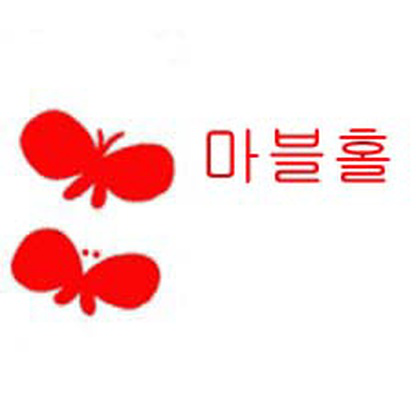

In [77]:
errimg

In [11]:
import torch

In [12]:
target = torch.ones([10, 64], dtype=torch.float32)

In [14]:
output = torch.full([10, 64], 1.5)

In [24]:
loss = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor([0.1, 1]))

In [25]:
loss(output, target)

RuntimeError: 1D target tensor expected, multi-target not supported

In [21]:
torch.tensor([[0.1, 1]]*64).shape

torch.Size([64, 2])